In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import randompartitions
from collections import Counter
import numpy
from scipy.stats import chi2

In [2]:
partition = randompartitions.randomPartition_AD5(100)
print(partition)

[9, 8, 8, 7, 7, 7, 6, 5, 5, 5, 5, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


##### The plot function is very badly behaved (creates its own figure with voodoo scalings, etc) and not to be relied on
### The French notation is assumed by default

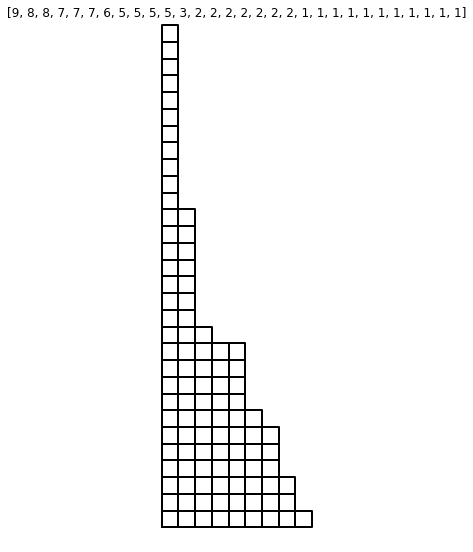

In [3]:
randompartitions.plot_YoungDiagram(partition)
plt.title(partition)

In [4]:
partition2 = randompartitions.randomPartition_AD5(100)
print(partition2)

[46, 10, 7, 6, 6, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]


### The english notation places the largest part on top.

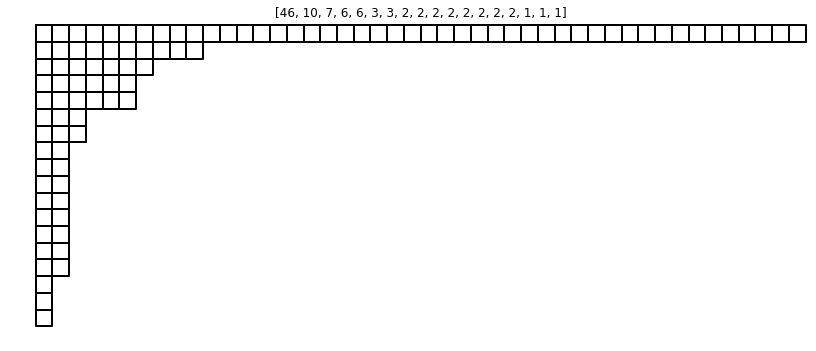

In [5]:
randompartitions.plot_YoungDiagram(partition2, notation='english')
plt.title(partition2)

### You can also put a constrain on the number of parts

In [6]:
partition_10parts = randompartitions.randomPartition_AD5(100, 10)
print(partition_10parts)

[30, 29, 16, 9, 5, 4, 4, 1, 1, 1]


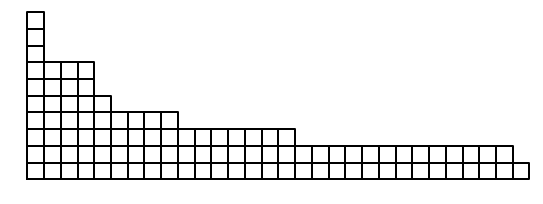

In [7]:
randompartitions.plot_YoungDiagram(partition_10parts)

### Is it uniform?

In [8]:
nb_draws = 1000
occurences = Counter([tuple(randompartitions.randomPartition_AD5(7)) for _ in range(nb_draws)])
occurences

Counter({(1, 1, 1, 1, 1, 1, 1): 71,
         (2, 1, 1, 1, 1, 1): 66,
         (2, 2, 1, 1, 1): 67,
         (2, 2, 2, 1): 75,
         (3, 1, 1, 1, 1): 55,
         (3, 2, 1, 1): 69,
         (3, 2, 2): 71,
         (3, 3, 1): 68,
         (4, 1, 1, 1): 72,
         (4, 2, 1): 75,
         (4, 3): 60,
         (5, 1, 1): 62,
         (5, 2): 68,
         (6, 1): 61,
         (7,): 60})

In [9]:
variance_discreteRV = ((len(occurences) + 1.0)**2 - 1.0)/12
variance_sample = numpy.var([i for i, s in enumerate(occurences.values()) for _ in range(s)])
variance_discreteRV, variance_sample

(21.25, 18.617856)

In [10]:
f = 1.0/len(occurences)
G_statistic = 2*sum([o*(numpy.log(o) - numpy.log(nb_draws) - numpy.log(f)) for o in occurences.values()])

In [11]:
G_statistic, chi2.sf(G_statistic, nb_draws - 1)

(7.4939353908968283, 1.0)

### p-value for the G test (LRT/information divergence goodness of fit) is 1.0
### It's uniform with probability virtually 1